# Prewiew

In [1]:
import pandas as pd
train = pd.read_csv('train.csv') 
test = pd.read_csv('test_truncated.csv', sep=';')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    8452 non-null   object 
 1   Address                 8452 non-null   object 
 2   Species                 8452 non-null   object 
 3   Block                   8452 non-null   int64  
 4   Street                  8452 non-null   object 
 5   Trap                    8452 non-null   object 
 6   AddressNumberAndStreet  8452 non-null   object 
 7   Latitude                8452 non-null   float64
 8   Longitude               8452 non-null   float64
 9   AddressAccuracy         8452 non-null   int64  
 10  NumMosquitos            8452 non-null   int64  
 11  WnvPresent              8452 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 792.5+ KB


In [2]:
test.head()

Date                                            Address  \
0  2011-06-10   1100 West Chicago Avenue, Chicago, IL 60642, USA   
1  2011-06-10      1700 West 95th Street, Chicago, IL 60643, USA   
2  2011-06-10   7500 North Oakley Avenue, Chicago, IL 60645, USA   
3  2011-06-10  5800 North Western Avenue, Chicago, IL 60659, USA   
4  2011-06-10  5000 South Central Avenue, Chicago, IL 60638, USA   

                  Species  Block          Street  Trap  \
0         CULEX TERRITANS     11       W CHICAGO  T049   
1  CULEX PIPIENS/RESTUANS     17       W 95TH ST  T094   
2          CULEX RESTUANS     75    N OAKLEY AVE  T148   
3  CULEX PIPIENS/RESTUANS     58   N WESTERN AVE  T028   
4  CULEX PIPIENS/RESTUANS     50   S CENTRAL AVE  T031   

             AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0      1100  W CHICAGO, Chicago, IL  41.896282 -87.655232                8   
1      1700  W 95TH ST, Chicago, IL  41.720848 -87.666014                9   
2   7500  N OAKLEY AVE, Chicago, IL  42.017430 -87.687769                8   
3  5800  N WESTERN AVE, Chicago, IL  41.986921 -87.689778                9   
4  5000  S CENTRAL AVE, Chicago, IL  41.801498 -87.763416                9   

   NumMosquitos  WnvPresent  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN

# Перевод даты

In [3]:
train.Date = pd.to_datetime(train.Date)

train['Year']  = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day']   = train['Date'].dt.day

# Train Data

In [4]:
X = train[['Species', 'Latitude', 'Longitude', 'Year', 'Month', 'Day']]
y = train['WnvPresent'].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

print('Размер выборки для обучения: ', len(X_train))
print('Размер выборки для тестирования: ', len(X_test))

Размер выборки для обучения:  6761
Размер выборки для тестирования:  1691


# Работа с дискретными переменными

In [6]:
train['Species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [7]:
ohe = pd.get_dummies(
    train['Species'],
    prefix='x'
).reset_index(drop=True)

ohe['Species'] = train['Species'].values
ohe.head()

x_CULEX ERRATICUS  x_CULEX PIPIENS  x_CULEX PIPIENS/RESTUANS  \
0                  0                0                         1   
1                  0                0                         0   
2                  0                0                         0   
3                  0                0                         1   
4                  0                0                         0   

   x_CULEX RESTUANS  x_CULEX SALINARIUS  x_CULEX TARSALIS  x_CULEX TERRITANS  \
0                 0                   0                 0                  0   
1                 1                   0                 0                  0   
2                 1                   0                 0                  0   
3                 0                   0                 0                  0   
4                 1                   0                 0                  0   

                  Species  
0  CULEX PIPIENS/RESTUANS  
1          CULEX RESTUANS  
2          CULEX RESTUANS  
3  CULEX PIPIENS/RESTUANS  
4          CULEX RESTUANS

In [8]:
X_test = pd.concat([X_test, pd.get_dummies(X_test['Species'])], axis=1)
X_train = pd.concat([X_train, pd.get_dummies(X_train['Species'])], axis=1)


X_train.drop('Species', axis=1, inplace=True)
X_test.drop('Species', axis=1, inplace=True)

X_test['CULEX ERRATICUS'] = 0
X_test['CULEX TARSALIS'] = 0

In [9]:
X_test.head()

Latitude  Longitude  Year  Month  Day  CULEX PIPIENS  \
8199  41.659112 -87.538693  2013      9   12              1   
2666  41.773215 -87.600880  2007      8   24              0   
1153  41.754676 -87.612922  2007      8    1              0   
4680  41.903002 -87.688267  2009      7   13              0   
7406  41.773215 -87.600880  2013      8    8              0   

      CULEX PIPIENS/RESTUANS  CULEX RESTUANS  CULEX SALINARIUS  \
8199                       0               0                 0   
2666                       0               1                 0   
1153                       1               0                 0   
4680                       1               0                 0   
7406                       1               0                 0   

      CULEX TERRITANS  CULEX ERRATICUS  CULEX TARSALIS  
8199                0                0               0  
2666                0                0               0  
1153                0                0               0  
4680                0                0               0  
7406                0                0               0

# Linear regression

In [10]:
from sklearn.linear_model import LinearRegression

mdl = LinearRegression(fit_intercept=True)

mdl = mdl.fit(X_train, y_train)

In [11]:
for var_name, coef_value in zip(X.columns, mdl.coef_):
    print(var_name, ': ', coef_value)
    
print('constant term: ', mdl.intercept_)

Species :  -0.00838896137989918
Latitude :  -0.13801873929740002
Longitude :  0.009624985528777562
Year :  0.019420198939782803
Month :  0.0007945050947827242
Day :  -0.09628021594793496
constant term:  -31.236792307926915


In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error

mean_forecast = np.ones_like(y_test) * np.mean(y_train)
model_forecast = mdl.predict(X_test)

print('Ошибка прогноза, при среднем значении: ', mean_squared_error(y_test, mean_forecast))
print('Ошибка прогноза с использованием модели: ', mean_squared_error(y_test, model_forecast))

Ошибка прогноза, при среднем значении:  0.05303164628143773
Ошибка прогноза с использованием модели:  0.06051575805005517


In [13]:
y_train_forecast = mdl.predict(X_train)

print('Ошибка на обучающих данных: ', mean_squared_error(y_train, y_train_forecast))
print('Ошибка на тестовых данных: ', mean_squared_error(y_test, model_forecast))

Ошибка на обучающих данных:  0.05356368970780882
Ошибка на тестовых данных:  0.06051575805005517


# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

mdl = LogisticRegression(fit_intercept=True).fit(X_train, y_train)

In [15]:
for var_name, coef_value in zip(X.columns, mdl.coef_[0]):
    print(var_name, ': ', coef_value)

Species :  -0.015469198808498502
Latitude :  0.11855652913284576
Longitude :  0.002615683313593184
Year :  0.3196159204514683
Month :  0.01927716899103365
Day :  -0.001160790345585194


In [16]:
from sklearn.metrics import accuracy_score

predictions = mdl.predict(X_test)
print('Оценочная точность: ', accuracy_score(y_test, predictions))

Оценочная точность:  0.9438202247191011


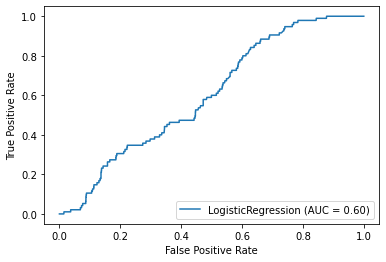

In [17]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(
    estimator=mdl,
    X=X_test,
    y=y_test
)

plt.show()

In [18]:
from sklearn.metrics import roc_auc_score

ps = mdl.predict_proba(X_test)[:, 1]
print('model AUC: ', roc_auc_score(y_test, ps))

model AUC:  0.6011772853185596


# Weather data

In [19]:
weather = pd.read_csv('weather.csv')
weather.head()

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   

   ... CodeSum Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0  ...             0      M      0.0        0.00       29.10    29.82   
1  ...             M      M        M        0.00       29.18    29.82   
2  ...      BR     0      M      0.0        0.00       29.38    30.09   
3  ...   BR HZ     M      M        M        0.00       29.44    30.08   
4  ...             0      M      0.0        0.00       29.39    30.12   

  ResultSpeed ResultDir  AvgSpeed  
0         1.7        27       9.2  
1         2.7        25       9.6  
2        13.0         4      13.4  
3        13.3         2      13.4  
4        11.7         7      11.9  

[5 rows x 22 columns]

In [20]:
weather.Date = pd.to_datetime(weather.Date)

In [21]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   object        
 5   Depart       2944 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2944 non-null   object        
 8   Heat         2944 non-null   object        
 9   Cool         2944 non-null   object        
 10  Sunrise      2944 non-null   object        
 11  Sunset       2944 non-null   object        
 12  CodeSum      2944 non-null   object        
 13  Depth        2944 non-null   object        
 14  Water1       2944 non-null   object        
 15  SnowFall     2944 non-null   object        
 16  Precip

In [22]:
check_missing_values = ['Depart','Heat','Cool','Sunrise','Sunset','Depth','Water1','SnowFall']
for col in weather[check_missing_values]:
    station_1 = len(weather[(weather[col].str.contains('\D')) & (weather.Station==1)])
    print('Stantion 1: ' + col + ' = ' + str(station_1))
    station_2 = len(weather[(weather[col].str.contains('\D')) & (weather.Station==2)])
    print('Stantion 2: ' + col + ' = ' + str(station_2))
    print(' ')

Stantion 1: Depart = 1271
Stantion 2: Depart = 1472
 
Stantion 1: Heat = 0
Stantion 2: Heat = 11
 
Stantion 1: Cool = 1096
Stantion 2: Cool = 1021
 
Stantion 1: Sunrise = 0
Stantion 2: Sunrise = 1472
 
Stantion 1: Sunset = 0
Stantion 2: Sunset = 1472
 
Stantion 1: Depth = 0
Stantion 2: Depth = 1472
 
Stantion 1: Water1 = 1472
Stantion 2: Water1 = 1472
 
Stantion 1: SnowFall = 1472
Stantion 2: SnowFall = 1472
 


In [23]:
weather = weather[weather.columns.drop(['Depart','Cool','Water1','SnowFall'])]

weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb',
       'Heat', 'Sunrise', 'Sunset', 'CodeSum', 'Depth', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [24]:
weather = weather[weather.Station==1].drop('Station',axis=1)

In [25]:
weather.head()

Date  Tmax  Tmin Tavg  DewPoint WetBulb Heat Sunrise Sunset CodeSum  \
0 2007-05-01    83    50   67        51      56    0    0448   1849           
2 2007-05-02    59    42   51        42      47   14    0447   1850      BR   
4 2007-05-03    66    46   56        40      48    9    0446   1851           
6 2007-05-04    66    49   58        41      50    7    0444   1852      RA   
8 2007-05-05    66    53   60        38      49    5    0443   1853           

  Depth PrecipTotal StnPressure SeaLevel  ResultSpeed  ResultDir AvgSpeed  
0     0        0.00       29.10    29.82          1.7         27      9.2  
2     0        0.00       29.38    30.09         13.0          4     13.4  
4     0        0.00       29.39    30.12         11.7          7     11.9  
6     0           T       29.31    30.05         10.4          8     10.8  
8     0           T       29.40    30.10         11.7          7     12.0

In [26]:
def change_type(column):
    weather[column] = weather[column].str.replace('T','0.005')
    weather[column] = weather[column].str.replace('M','0.0')
    weather[column] = weather[column].astype(float)
    
change_type('Tavg')
change_type('PrecipTotal')
change_type('WetBulb')
change_type('Heat')
change_type('StnPressure')
change_type('SeaLevel')
change_type('AvgSpeed')
change_type('Sunrise')
change_type('Sunset')
change_type('Depth')

In [27]:
weather.CodeSum[weather.CodeSum!=' '] = '1'
weather.CodeSum[weather.CodeSum!='1'] = '0'
weather.CodeSum = weather.CodeSum.astype(float)

<ipython-input-27-54e7e7905926>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather.CodeSum[weather.CodeSum!=' '] = '1'
<ipython-input-27-54e7e7905926>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather.CodeSum[weather.CodeSum!='1'] = '0'


In [28]:
weather.CodeSum

0       0.0
2       1.0
4       0.0
6       1.0
8       0.0
       ... 
2934    0.0
2936    0.0
2938    0.0
2940    0.0
2942    1.0
Name: CodeSum, Length: 1472, dtype: float64

In [29]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 2942
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1472 non-null   datetime64[ns]
 1   Tmax         1472 non-null   int64         
 2   Tmin         1472 non-null   int64         
 3   Tavg         1472 non-null   float64       
 4   DewPoint     1472 non-null   int64         
 5   WetBulb      1472 non-null   float64       
 6   Heat         1472 non-null   float64       
 7   Sunrise      1472 non-null   float64       
 8   Sunset       1472 non-null   float64       
 9   CodeSum      1472 non-null   float64       
 10  Depth        1472 non-null   float64       
 11  PrecipTotal  1472 non-null   float64       
 12  StnPressure  1472 non-null   float64       
 13  SeaLevel     1472 non-null   float64       
 14  ResultSpeed  1472 non-null   float64       
 15  ResultDir    1472 non-null   int64         
 16  AvgSpe

In [30]:
def weather_add(table, col, days_range):
    
    new_list = []
    for i in table['Date']:
        mask = (weather['Date'] <= i) & (weather['Date'] >= i - pd.Timedelta(days_range))
        data_list = np.mean(weather[col][mask])
        new_list.append(data_list)
    return new_list

In [31]:
for col in weather.columns.drop(['Date']):
    train[col] = weather_add(train ,col, 3)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    8452 non-null   datetime64[ns]
 1   Address                 8452 non-null   object        
 2   Species                 8452 non-null   object        
 3   Block                   8452 non-null   int64         
 4   Street                  8452 non-null   object        
 5   Trap                    8452 non-null   object        
 6   AddressNumberAndStreet  8452 non-null   object        
 7   Latitude                8452 non-null   float64       
 8   Longitude               8452 non-null   float64       
 9   AddressAccuracy         8452 non-null   int64         
 10  NumMosquitos            8452 non-null   int64         
 11  WnvPresent              8452 non-null   int64         
 12  Year                    8452 non-null   int64   

In [33]:
X = train.drop(['Date', 'Address', 'Street', 'Trap', 'AddressNumberAndStreet', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent'], axis=1)
y = train['WnvPresent'].values

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      8452 non-null   object 
 1   Block        8452 non-null   int64  
 2   Latitude     8452 non-null   float64
 3   Longitude    8452 non-null   float64
 4   Year         8452 non-null   int64  
 5   Month        8452 non-null   int64  
 6   Day          8452 non-null   int64  
 7   Tmax         8452 non-null   float64
 8   Tmin         8452 non-null   float64
 9   Tavg         8452 non-null   float64
 10  DewPoint     8452 non-null   float64
 11  WetBulb      8452 non-null   float64
 12  Heat         8452 non-null   float64
 13  Sunrise      8452 non-null   float64
 14  Sunset       8452 non-null   float64
 15  CodeSum      8452 non-null   float64
 16  Depth        8452 non-null   float64
 17  PrecipTotal  8452 non-null   float64
 18  StnPressure  8452 non-null   float64
 19  SeaLev

In [35]:
X = pd.concat([X, pd.get_dummies(X['Species'])], axis=1)

X.drop('Species', axis=1, inplace=True)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

print('Размер выборки для обучения: ', len(X_train))
print('Размер выборки для тестирования: ', len(X_test))

Размер выборки для обучения:  6761
Размер выборки для тестирования:  1691


In [39]:
from sklearn.linear_model import LogisticRegression

mdl = LogisticRegression(fit_intercept=True, solver='lbfgs').fit(X_train, y_train)

c:\users\vova\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
for var_name, coef_value in zip(X_train.columns, mdl.coef_[0]):
    print(var_name, ': ', coef_value)

Block :  0.003914134773629811
Latitude :  -0.0007055295278373674
Longitude :  0.0044733059387611195
Year :  -0.02765824922255595
Month :  0.0067176834871958396
Day :  -0.012000654890119623
Tmax :  -0.03537994075000108
Tmin :  0.025866017433393406
Tavg :  -0.00018466821727214594
DewPoint :  0.030542268291983612
WetBulb :  0.034511389706663516
Heat :  -0.02695282486449199
Sunrise :  0.03542004806926639
Sunset :  0.01808690068929193
CodeSum :  -0.00482395788995049
Depth :  0.0
PrecipTotal :  -0.007283185104818079
StnPressure :  0.004520482545265982
SeaLevel :  -0.0025636126892551302
ResultSpeed :  -0.0353071532955797
ResultDir :  0.0020715488796527997
AvgSpeed :  -0.019240325097910217
CULEX ERRATICUS :  -2.789965700275268e-05
CULEX PIPIENS :  0.013811236635227916
CULEX PIPIENS/RESTUANS :  0.0009298894017001905
CULEX RESTUANS :  -0.011033166530051926
CULEX SALINARIUS :  -0.0009609812903973656
CULEX TARSALIS :  -4.9526902026891704e-05
CULEX TERRITANS :  -0.0027652945690463697


In [39]:
from sklearn.metrics import accuracy_score

predictions = mdl.predict(X_test)
print('Оценочная точность: ', accuracy_score(y_test, predictions))

Оценочная точность:  0.9438202247191011


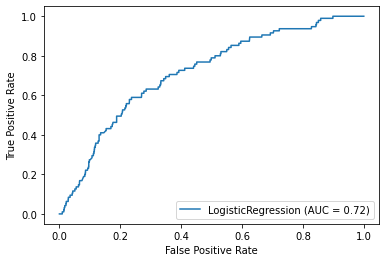

In [40]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(
    estimator=mdl,
    X=X_test,
    y=y_test
)

plt.show()

In [41]:
from sklearn.metrics import roc_auc_score

ps = mdl.predict_proba(X_test)[:, 1]
print('model AUC: ', roc_auc_score(y_test, ps))

model AUC:  0.7162742382271469


In [42]:
mdl = LinearRegression().fit(X_train, y_train)

train_predictions = mdl.predict(X_train)
test_predictions = mdl.predict(X_test)

print('Ошибка на обучающем наборе: ', mean_squared_error(y_train, train_predictions))
print('Ошибка на тестовом наборе: ', mean_squared_error(y_test, test_predictions))

Ошибка на обучающем наборе:  0.05166885215405627
Ошибка на тестовом наборе:  0.049824290824715914


# Работа с непрерывными переменными

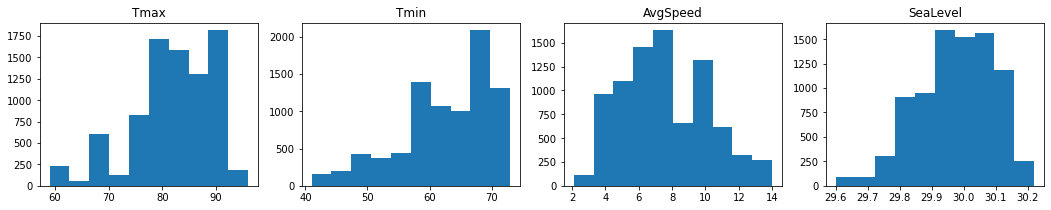

In [43]:
plt.figure(figsize=(18, 3))

plt.subplot(141)
plt.hist(X['Tmax'])
plt.title('Tmax')

plt.subplot(142)
plt.hist(X['Tmin'])
plt.title('Tmin')

plt.subplot(143)
plt.hist(X['AvgSpeed'])
plt.title('AvgSpeed')

plt.subplot(144)
plt.hist(X['SeaLevel'])
plt.title('SeaLevel')

plt.show()

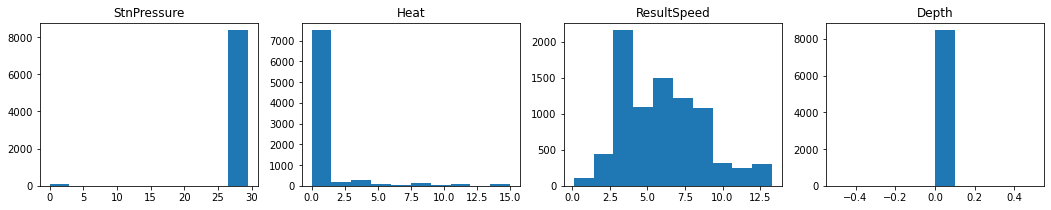

In [44]:
plt.figure(figsize=(18, 3))

plt.subplot(141)
plt.hist(X['StnPressure'])
plt.title('StnPressure')

plt.subplot(142)
plt.hist(X['Heat'])
plt.title('Heat')

plt.subplot(143)
plt.hist(X['ResultSpeed'])
plt.title('ResultSpeed')

plt.subplot(144)
plt.hist(X['Depth'])
plt.title('Depth')

plt.show()

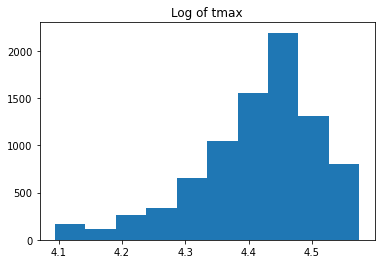

In [45]:
import numpy as np

plt.hist(np.log1p(X['Tmax']))
plt.title('Log of tmax')
plt.show()

In [46]:
X_train['Tmax'] = np.log(X_train['Tmax'])
X_test['Tmax'] = np.log(X_test['Tmax'])

X_train['Tmin'] = np.log(X_train['Tmin'])
X_test['Tmin'] = np.log(X_test['Tmin'])

mdl = LinearRegression().fit(X_train, y_train)

train_predictions = mdl.predict(X_train)
test_predictions = mdl.predict(X_test)

print('Ошибка на обучающем наборе: ', mean_squared_error(y_train, train_predictions))
print('Ошибка на тестовом наборе: ', mean_squared_error(y_test, test_predictions))

Ошибка на обучающем наборе:  0.05170326922550069
Ошибка на тестовом наборе:  0.049865657740405515


<ipython-input-46-1821828cc761>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Tmax'] = np.log(X_train['Tmax'])
<ipython-input-46-1821828cc761>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Tmax'] = np.log(X_test['Tmax'])
<ipython-input-46-1821828cc761>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [47]:
from sklearn.metrics import roc_curve, auc

mdl = LogisticRegression().fit(X_train, y_train)

train_preds, test_preds = mdl.predict_proba(X_train)[:, 1], mdl.predict_proba(X_test)[:, 1]

train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)

train_auc, test_auc = np.round(auc(train_fpr, train_tpr), 4), np.round(auc(test_fpr, test_tpr), 4)

print(f'Train AUC: {train_auc}')
print(f'Test AUC: {test_auc}')

Train AUC: 0.7197
Test AUC: 0.7224


c:\users\vova\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Важность переменных

In [48]:
from sklearn.inspection import permutation_importance

importances = permutation_importance(
    mdl, X_test, y_test,
    n_repeats=10,
    random_state=42
)

for i, column in enumerate(X_test.columns):
    
    print(column, importances.importances_mean[i], importances.importances_std[i])

Block 0.0 0.0
Latitude 0.0 0.0
Longitude 0.0 0.0
Year 0.0 0.0
Month 0.0 0.0
Day 0.0 0.0
Tmax 0.0 0.0
Tmin 0.0 0.0
Tavg 0.0 0.0
DewPoint 0.0 0.0
WetBulb 0.0 0.0
Heat 0.0 0.0
Sunrise 0.038143110585452354 0.003368710909196018
Sunset 0.027557658190419852 0.0021517924776653426
CodeSum 0.0 0.0
Depth 0.0 0.0
PrecipTotal 0.0 0.0
StnPressure 0.0 0.0
SeaLevel 0.0 0.0
ResultSpeed 0.0 0.0
ResultDir 0.0 0.0
AvgSpeed 0.0 0.0
CULEX ERRATICUS 0.0 0.0
CULEX PIPIENS 0.0 0.0
CULEX PIPIENS/RESTUANS 0.0 0.0
CULEX RESTUANS 0.0 0.0
CULEX SALINARIUS 0.0 0.0
CULEX TARSALIS 0.0 0.0
CULEX TERRITANS 0.0 0.0


In [49]:
X_train.drop(['Block', 'Latitude', 'Longitude', 'Depth'], axis=1, inplace=True)
X_test.drop(['Block', 'Latitude', 'Longitude', 'Depth'], axis=1, inplace=True)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6761 entries, 3199 to 7371
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    6761 non-null   int64  
 1   Month                   6761 non-null   int64  
 2   Day                     6761 non-null   int64  
 3   Tmax                    6761 non-null   float64
 4   Tmin                    6761 non-null   float64
 5   Tavg                    6761 non-null   float64
 6   DewPoint                6761 non-null   float64
 7   WetBulb                 6761 non-null   float64
 8   Heat                    6761 non-null   float64
 9   Sunrise                 6761 non-null   float64
 10  Sunset                  6761 non-null   float64
 11  CodeSum                 6761 non-null   float64
 12  PrecipTotal             6761 non-null   float64
 13  StnPressure             6761 non-null   float64
 14  SeaLevel                6761 non-null

c:\users\vova\miniconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


c:\users\vova\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


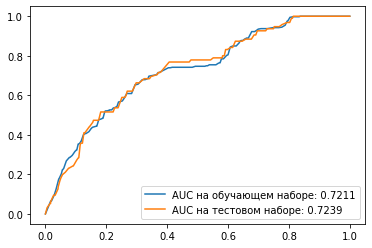

In [50]:
from sklearn.metrics import roc_curve, auc

mdl = LogisticRegression().fit(X_train, y_train)

train_preds, test_preds = mdl.predict_proba(X_train)[:, 1], mdl.predict_proba(X_test)[:, 1]

train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)

train_auc, test_auc = np.round(auc(train_fpr, train_tpr), 4), np.round(auc(test_fpr, test_tpr), 4)

plt.plot(train_fpr, train_tpr, label=f'AUC на обучающем наборе: {train_auc}')
plt.plot(test_fpr, test_tpr, label=f'AUC на тестовом наборе: {test_auc}')
plt.legend()
plt.show()

# Выбросы

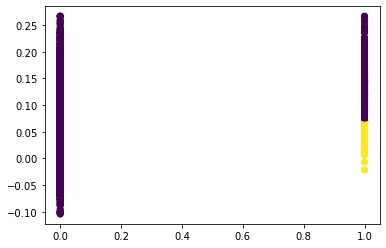

In [51]:
train_errors = np.abs(y_train - train_predictions)
percentile99 = np.percentile(train_errors, 99)
is_big_error = np.where(train_errors > percentile99, 1, 0)

plt.scatter(
    y_train,
    train_predictions,
    c=is_big_error
)

plt.show()

In [52]:
inline_mask = train_errors <= percentile99
X_train, y_train = X_train[inline_mask], y_train[inline_mask]

mdl = LinearRegression().fit(X_train, y_train)

train_predictions = mdl.predict(X_train)
test_predictions = mdl.predict(X_test)

print('Ошибка на обучающем наборе: ', mean_squared_error(y_train, train_predictions))
print('Ошибка на тестовом наборе: ', mean_squared_error(y_test, test_predictions))

Ошибка на обучающем наборе:  0.043090065033912724
Ошибка на тестовом наборе:  0.05040468468388354


# Кросс-валидация

In [53]:
from sklearn.model_selection import KFold

kf = KFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

In [54]:
train_res, test_res = [], []

for train_idx, test_idx in kf.split(X, y):
    
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]
        
    mdl = LinearRegression().fit(X_train, y_train)
    
    y_train_preds, y_test_preds = mdl.predict(X_train), mdl.predict(X_test)
    
    train_res.append(np.round(mean_squared_error(y_train, y_train_preds), 2))
    test_res.append(np.round(mean_squared_error(y_test, y_test_preds), 2))

print('Ошибки на обучающих наборах: ', train_res)
print('Ошибки на тестовых наборах: ', test_res)

Ошибки на обучающих наборах:  [0.05, 0.05, 0.05, 0.05, 0.05]
Ошибки на тестовых наборах:  [0.05, 0.05, 0.05, 0.05, 0.06]


In [55]:
print(f'Ожидаемая ошибка на обучающем наборе: {np.mean(train_res)} +- {np.std(train_res)}')
print(f'Ожидаемая ошибка на тестовом наборе: {np.mean(test_res)} +- {np.std(test_res)}')

Ожидаемая ошибка на обучающем наборе: 0.05 +- 0.0
Ожидаемая ошибка на тестовом наборе: 0.052000000000000005 +- 0.0039999999999999975


# Decision Tree / Random Forest

In [56]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

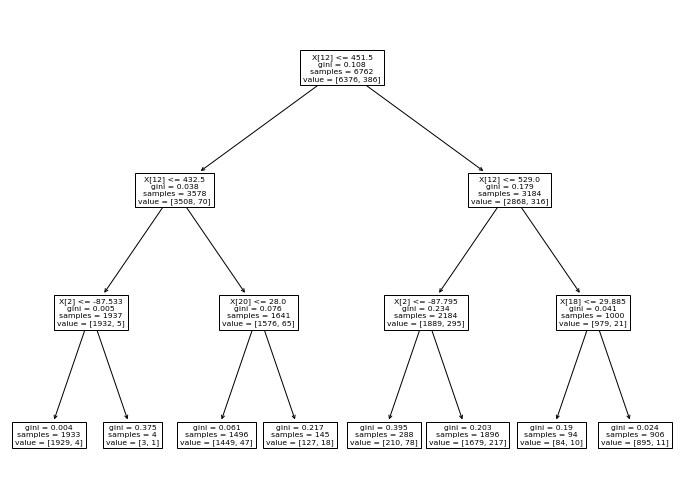

In [57]:
from sklearn.tree import plot_tree 

plt.figure(figsize=(12,9))
plot_tree(tree)
plt.show()

In [58]:
predictions = tree.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, predictions, average='macro', multi_class='ovr')
print(auc)

0.7780060401741817


In [59]:
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features=0.8,
    bootstrap=True,
    max_samples=0.8,
    random_state=42
)

rt = rt.fit(X_train, y_train)

auc = roc_auc_score(y_test, rt.predict_proba(X_test)[:, 1], average='macro', multi_class='ovr')

print(auc)

0.7986374490799268


In [60]:
from sklearn.model_selection import GridSearchCV

params_grid = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(2, 6)), 'min_samples_leaf': list(range(1, 5))}

rt = RandomForestClassifier(
    n_estimators=80,
    min_samples_split=10,
    max_features=0.8,
    bootstrap=True,
    max_samples=0.8,
    random_state=42
)

grid = GridSearchCV(rt, params_grid, cv=5).fit(X_train, y_train)

In [61]:
results = pd.DataFrame(grid.cv_results_)
best_result = results[results['rank_test_score'] == 1]
print(best_result['params'].values, best_result['mean_test_score'].values)

[{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1}
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 2}
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 3}
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 4}] [0.78773884 0.78773884 0.78773884 0.78773884]


In [62]:
pred = grid.best_estimator_.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, pred, average='macro', multi_class='ovr')

print(auc)
print(grid.score(X_test, y_test))

0.8035714285714285
0.936094674556213


# Gradient Boost

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=69).fit(X_train, y_train)
gb.score(X_test, y_test)   

pred = gb.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, pred, average='macro', multi_class='ovr')

print(auc)

0.8332777309547221


In [64]:
gb.score(X_test, y_test)

0.936094674556213

In [65]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=69)

params_grid = {
    'max_depth': list(range(1, 6)), 'min_samples_leaf': list(range(1, 5))
}

grid = GridSearchCV(rt, params_grid, cv=5).fit(X_train, y_train)

pred = grid.best_estimator_.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, pred, average='macro', multi_class='ovr')

print(auc)
print(grid.score(X_test, y_test))

0.7175340637730019
0.936094674556213


# Support Vector Machine

In [66]:
from sklearn.svm import SVC

svmc= SVC(C=1., kernel='rbf', probability=True)
svm_model = svmc.fit(X_train,y_train)

pred = svm_model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, pred, average='macro', multi_class='ovr')

print(auc)

0.7198459521468371


In [67]:
svm = SVC()

params_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.5, 1, 2, 5]
}

clf = GridSearchCV(
    estimator=svm,
    param_grid=params_grid,
    scoring='f1_macro',
    cv=4
)

clf = clf.fit(X_train, y_train)
grid_search_results = pd.DataFrame(clf.cv_results_)
grid_search_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.621591      0.082159         0.019450        0.001497     0.5   
1        0.087769      0.002444         0.025433        0.000865     0.5   
2        0.116936      0.001899         0.033896        0.000024     0.5   
3        0.150098      0.003345         0.047625        0.002044     0.5   
4        0.457785      0.072861         0.019446        0.001494       1   
5        0.092508      0.004314         0.027173        0.001638       1   
6        0.119195      0.001503         0.033647        0.000422       1   
7        0.153848      0.002875         0.046618        0.000427       1   
8        0.576948      0.120452         0.019697        0.000432       2   
9        0.093509      0.005760         0.026189        0.000427       2   
10       0.125914      0.004277         0.036152        0.001782       2   
11       0.154831      0.003697         0.046621        0.000429       2   
12       0.721077      0.169713         0.018444        0.002051       5   
13       0.116198      0.009214         0.029677        0.002476       5   
14       0.141607      0.003676         0.038148        0.002272       5   
15       0.171782      0.007933         0.048379        0.002054       5   

   param_kernel                           params  split0_test_score  \
0        linear   {'C': 0.5, 'kernel': 'linear'}           0.485236   
1          poly     {'C': 0.5, 'kernel': 'poly'}           0.485236   
2           rbf      {'C': 0.5, 'kernel': 'rbf'}           0.485236   
3       sigmoid  {'C': 0.5, 'kernel': 'sigmoid'}           0.485236   
4        linear     {'C': 1, 'kernel': 'linear'}           0.485236   
5          poly       {'C': 1, 'kernel': 'poly'}           0.485236   
6           rbf        {'C': 1, 'kernel': 'rbf'}           0.485236   
7       sigmoid    {'C': 1, 'kernel': 'sigmoid'}           0.485236   
8        linear     {'C': 2, 'kernel': 'linear'}           0.485236   
9          poly       {'C': 2, 'kernel': 'poly'}           0.485236   
10          rbf        {'C': 2, 'kernel': 'rbf'}           0.485236   
11      sigmoid    {'C': 2, 'kernel': 'sigmoid'}           0.485236   
12       linear     {'C': 5, 'kernel': 'linear'}           0.485236   
13         poly       {'C': 5, 'kernel': 'poly'}           0.485236   
14          rbf        {'C': 5, 'kernel': 'rbf'}           0.485236   
15      sigmoid    {'C': 5, 'kernel': 'sigmoid'}           0.485236   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0            0.485236           0.485384           0.336473         0.448082   
1            0.485236           0.485384           0.485384         0.485310   
2            0.485236           0.485384           0.485384         0.485310   
3            0.485236           0.485384           0.485384         0.485310   
4            0.485236           0.485384           0.243135         0.424748   
5            0.485236           0.485384           0.485384         0.485310   
6            0.485236           0.485384           0.485384         0.485310   
7            0.485236           0.485384           0.485384         0.485310   
8            0.485236           0.485384           0.160153         0.404002   
9            0.485236           0.485384           0.485384         0.485310   
10           0.485236           0.485384           0.485384         0.485310   
11           0.485236           0.485384           0.485384         0.485310   
12           0.540339           0.485384           0.146366         0.414331   
13           0.485236           0.485384           0.485384         0.485310   
14           0.485236           0.485384           0.485384         0.485310   
15           0.485236           0.485384           0.485384         0.485310   

    std_test_score  rank_test_score  
0         0.064438               13  
1         0.000074                1  
2         0.000074          

# XG Boost

In [68]:
import sys
!{sys.executable} -m pip install xgboost

import xgboost as xgb

In [69]:
from xgboost.sklearn import XGBClassifier  

model = XGBClassifier(objective = 'binary:logistic', eval_metric = "logloss", use_label_encoder=False)
xgm = model.fit(X_train, y_train, eval_metric=roc_auc_score)

pred = xgm.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, pred, average='macro', multi_class='ovr')

print(auc)
print(xgm.score(X_test, y_test))

0.8028573769724212
0.9301775147928995


In [70]:
from sklearn.model_selection import GridSearchCV

params = {'objective': 'binary:logistic', 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8,
          'colsample_bylevel': 0.8, 'reg_lambda': 0.5, 'gamma': 1., 'max_depth': 6, 'min_child_weight': 5,
          'eval_metric': 'auc', 'seed': 32, 'n_estimators': 30}

xgb_mdl = XGBClassifier(use_label_encoder=False, **params)

params_grid = {'max_depth': list(range(1, 6)), 'min_child_weight': list(range(1, 6))}

clf = GridSearchCV(
    estimator=xgb_mdl,
    param_grid=params_grid,
    scoring='roc_auc',
    cv=4
).fit(X, y)

results = pd.DataFrame(clf.cv_results_)
best_result = results[results['rank_test_score'] == 1]
print(best_result['params'].values, best_result['mean_test_score'].values)

[{'max_depth': 1, 'min_child_weight': 4}
 {'max_depth': 1, 'min_child_weight': 5}] [0.68877789 0.68877789]


# Test Data

In [71]:
test.Date = pd.to_datetime(test.Date)

test['Year']  = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day']   = test['Date'].dt.day

In [72]:
for col in weather.columns.drop(['Date']):
    test[col] = weather_add(test, col, 3)

In [73]:
test = test.drop(['Date', 'Address', 'Street', 'Trap', 'AddressNumberAndStreet', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent'], axis=1)

In [74]:
test = pd.concat([test, pd.get_dummies(test['Species'])], axis=1)

test.drop('Species', axis=1, inplace=True)

In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Block                   2054 non-null   int64  
 1   Latitude                2054 non-null   float64
 2   Longitude               2054 non-null   float64
 3   Year                    2054 non-null   int64  
 4   Month                   2054 non-null   int64  
 5   Day                     2054 non-null   int64  
 6   Tmax                    2054 non-null   float64
 7   Tmin                    2054 non-null   float64
 8   Tavg                    2054 non-null   float64
 9   DewPoint                2054 non-null   float64
 10  WetBulb                 2054 non-null   float64
 11  Heat                    2054 non-null   float64
 12  Sunrise                 2054 non-null   float64
 13  Sunset                  2054 non-null   float64
 14  CodeSum                 2054 non-null   

In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8450
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Block                   6762 non-null   int64  
 1   Latitude                6762 non-null   float64
 2   Longitude               6762 non-null   float64
 3   Year                    6762 non-null   int64  
 4   Month                   6762 non-null   int64  
 5   Day                     6762 non-null   int64  
 6   Tmax                    6762 non-null   float64
 7   Tmin                    6762 non-null   float64
 8   Tavg                    6762 non-null   float64
 9   DewPoint                6762 non-null   float64
 10  WetBulb                 6762 non-null   float64
 11  Heat                    6762 non-null   float64
 12  Sunrise                 6762 non-null   float64
 13  Sunset                  6762 non-null   float64
 14  CodeSum                 6762 non-null   

In [77]:
X_train.drop('CULEX ERRATICUS', axis=1, inplace=True)

X_train.drop(['Block', 'Latitude', 'Longitude', 'Depth'], axis=1, inplace=True)
test.drop(['Block', 'Latitude', 'Longitude', 'Depth'], axis=1, inplace=True)

In [84]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=69).fit(X_train, y_train)

test_results = gb.predict_proba(test)[:, 1]

In [85]:
test_results

array([1.61500740e-05, 2.60896903e-04, 1.32694758e-04, ...,
       1.05111355e-02, 2.04612052e-02, 1.05111355e-02])

In [86]:
test_truncated = pd.read_csv('test_truncated.csv', sep=';')
test_truncated['WnvPresent'] = test_results

In [87]:
test_truncated.head()

Date                                            Address  \
0  2011-06-10   1100 West Chicago Avenue, Chicago, IL 60642, USA   
1  2011-06-10      1700 West 95th Street, Chicago, IL 60643, USA   
2  2011-06-10   7500 North Oakley Avenue, Chicago, IL 60645, USA   
3  2011-06-10  5800 North Western Avenue, Chicago, IL 60659, USA   
4  2011-06-10  5000 South Central Avenue, Chicago, IL 60638, USA   

                  Species  Block          Street  Trap  \
0         CULEX TERRITANS     11       W CHICAGO  T049   
1  CULEX PIPIENS/RESTUANS     17       W 95TH ST  T094   
2          CULEX RESTUANS     75    N OAKLEY AVE  T148   
3  CULEX PIPIENS/RESTUANS     58   N WESTERN AVE  T028   
4  CULEX PIPIENS/RESTUANS     50   S CENTRAL AVE  T031   

             AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0      1100  W CHICAGO, Chicago, IL  41.896282 -87.655232                8   
1      1700  W 95TH ST, Chicago, IL  41.720848 -87.666014                9   
2   7500  N OAKLEY AVE, Chicago, IL  42.017430 -87.687769                8   
3  5800  N WESTERN AVE, Chicago, IL  41.986921 -87.689778                9   
4  5000  S CENTRAL AVE, Chicago, IL  41.801498 -87.763416                9   

   NumMosquitos  WnvPresent  
0           NaN    0.000016  
1           NaN    0.000261  
2           NaN    0.000133  
3           NaN    0.000261  
4           NaN    0.000261

In [88]:
test_truncated.to_csv('Results.csv')